In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
from MyLinReg import MyLineReg

In [3]:
# Загружаем датасет Boston Housing
boston = fetch_openml(name='boston', as_frame=True)
data = boston['data']
target = boston['target']

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [4]:
X = data
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [8]:
model = MyLineReg(n_iter=1000, learning_rate=0.01, metric='rmse', reg='l2', l2_coef=0.1)
model.fit(X_train_scaled, y_train, verbose=100)

Iteration 1, learning rate: 0.01
Iteration 2, learning rate: 0.01
Iteration 3, learning rate: 0.01
Iteration 4, learning rate: 0.01
Iteration 5, learning rate: 0.01
Iteration 6, learning rate: 0.01
Iteration 7, learning rate: 0.01
Iteration 8, learning rate: 0.01
Iteration 9, learning rate: 0.01
Iteration 10, learning rate: 0.01
Iteration 11, learning rate: 0.01
Iteration 12, learning rate: 0.01
Iteration 13, learning rate: 0.01
Iteration 14, learning rate: 0.01
Iteration 15, learning rate: 0.01
Iteration 16, learning rate: 0.01
Iteration 17, learning rate: 0.01
Iteration 18, learning rate: 0.01
Iteration 19, learning rate: 0.01
Iteration 20, learning rate: 0.01
Iteration 21, learning rate: 0.01
Iteration 22, learning rate: 0.01
Iteration 23, learning rate: 0.01
Iteration 24, learning rate: 0.01
Iteration 25, learning rate: 0.01
Iteration 26, learning rate: 0.01
Iteration 27, learning rate: 0.01
Iteration 28, learning rate: 0.01
Iteration 29, learning rate: 0.01
Iteration 30, learning 

In [10]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [11]:
# Вывод метрик
print("RMSE on training data:", model._calculate_metric(y_train, y_train_pred))
print("RMSE on test data:", model._calculate_metric(y_test, y_test_pred))

RMSE on training data: 12.484807732894257
RMSE on test data: 9.627005223550745


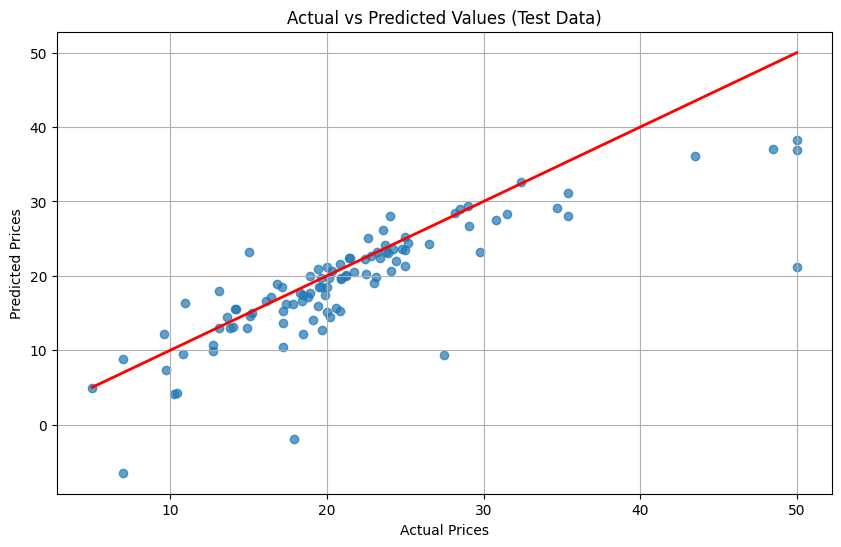

In [12]:
# 1. Фактические vs Предсказанные
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title("Actual vs Predicted Values (Test Data)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.show()

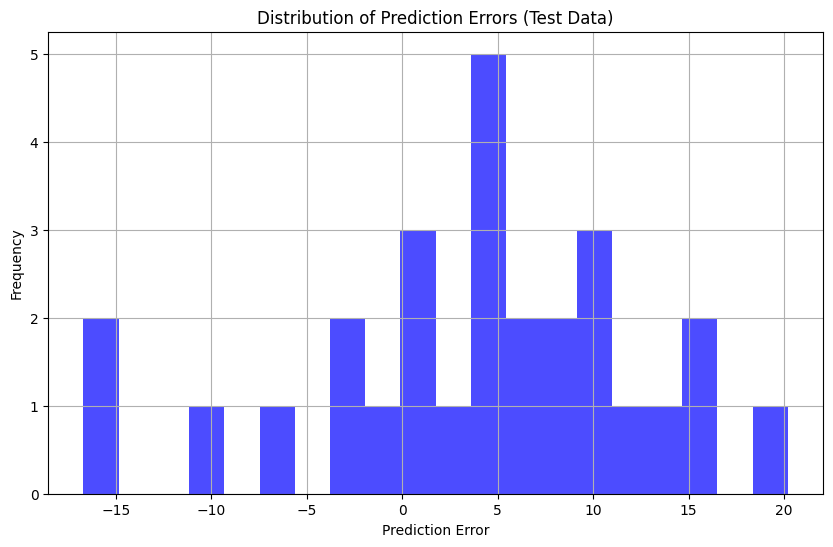

In [13]:
errors = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, alpha=0.7, color='blue')
plt.title("Distribution of Prediction Errors (Test Data)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid()
plt.show()